In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

Here, we have 60,000 images that are made up of 28x28 pixels

In [4]:
train_images[0,23,23] #looking at one pixel

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Here, each integer represents a specific article of clothing.

In [7]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

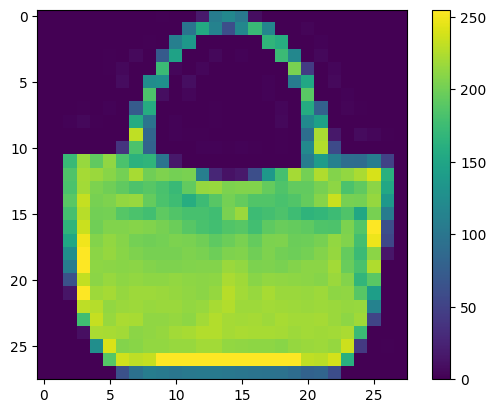

In [9]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape = (28,28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10, activation = 'softmax')
    ])

In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2168 - accuracy: 0.9191
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9214
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2053 - accuracy: 0.9232
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1995 - accuracy: 0.9253


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8856
Test Accuracy 0.8855999708175659


In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [22]:
predictions[0]

array([2.6457430e-12, 5.2296314e-12, 3.5155941e-11, 2.0599075e-10,
       1.0451131e-11, 3.2128119e-05, 9.6421990e-09, 2.4592008e-03,
       3.7365446e-08, 9.9750870e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

Pick a number:34
1/1 [==============================] - 0s 24ms/step


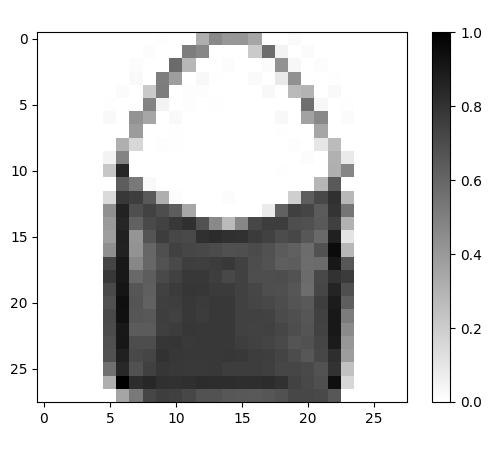

In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_name = ['T-shrt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_name[np.argmax(prediction)]

  show_image(image, class_name[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap = plt.cm.binary)
  plt.title('Expected' + label)
  plt.xlabel("Guess" + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number:")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
